In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [7]:
bias = 100
X, y, coeff = make_regression(n_features=1,bias=bias,coef=True,noise=10,random_state=42)

In [8]:
X.shape, y.shape

((100, 1), (100,))

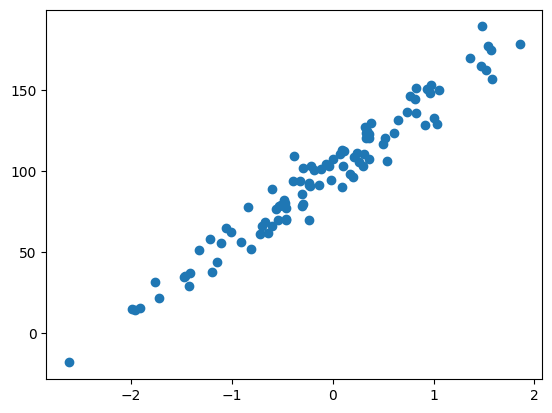

In [9]:
plt.scatter(X,y)

In [15]:
coeff, bias # here we have the m and c 

(array(41.74110031), 100)

In [12]:
y_h = coeff*X+bias

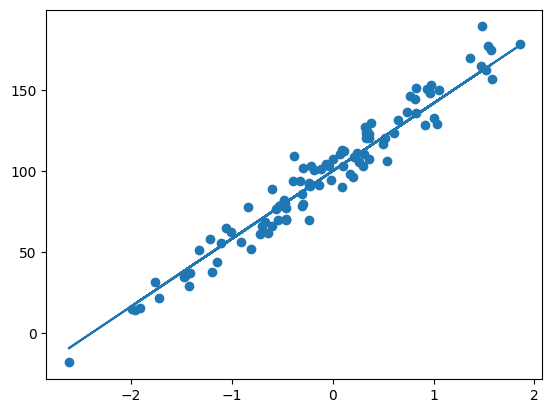

In [14]:
plt.scatter(X,y)
plt.plot(X,y_h)

## Plotting line using linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [19]:
model.fit(X,y)
# work done during training is figuring out m and c

LinearRegression()

In [21]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

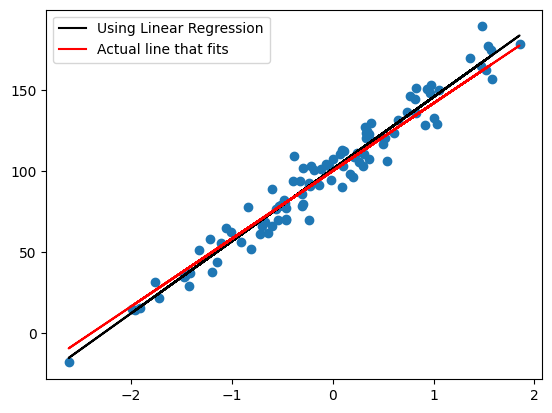

In [29]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),label="Using Linear Regression",c="black")
plt.plot(X,y_h,label="Actual line that fits",c="red")
plt.legend()

## Custom Linear Regression

In [33]:
class LinearRegCustom:
    def __init__(self, lr=0.1):
        self.lr = lr
    def fit(self,X,y):
        self._X = X #_X means X is private
        self._y = y.reshape(-1,1)
        # we need to figure out values of coeff, bias
        # step1: pick a random value for m and c
        self.coeff_ = np.random.random()
        self.intercept_ = np.random.random()

        # gradient descent
        errors = []
        # let's do gradient descent 50 times say
        for i in range(50):
            self.gradient_descend()
            errors.append(self.error())
        return errors
    def gradient_descend(self):
        # change in coeff and intercept
        d_coeff, d_intercept = self.gradient()
        self.coeff_ -= d_coeff*self.lr
        self.intercept_ -= d_intercept*self.lr
    def gradient(self):
        yh = self.predict(self._X)
        d_coeff = ((yh - self._y)*self._X).mean()
        d_intercept = (yh-self._y).mean()
        return d_coeff, d_intercept
    def predict(self, X):
        return self.coeff_*X+self.intercept_
    def error(self):
        return ((self.predict(self._X)-self._y)**2).sum()
        

In [47]:
model = LinearRegCustom()

In [48]:
errors = model.fit(X,y)

In [49]:
model.coeff_,model.intercept_

(43.2512932216322, 100.29346999450773)

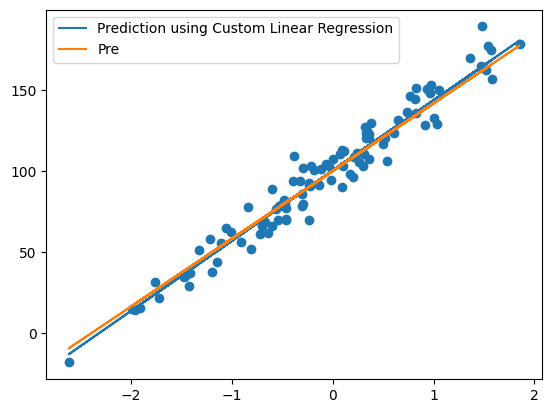

In [50]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),label="Prediction using Custom Linear Regression")
plt.plot(X,y_h,label = "Pre")
plt.legend()

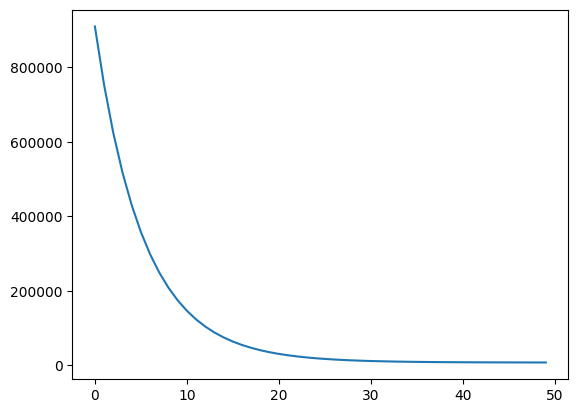

In [51]:
plt.plot(errors)

In [52]:
model.error()

7976.277510865286

In [53]:
min_error = model.error()
min_lr = 0.1
for i in range(1,10):
    model = LinearRegCustom(lr=.1*i)
    errors = model.fit(X,y)
    m_error = model.error()
    if m_error<min_error:
        min_error = m_error
        min_lr = .1*i
print(min_error, min_lr)

7805.425042123899 0.6000000000000001
